# Heart Disease Multiple Classification

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data - Originally available at Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(df.info)

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

There is a total of 14 columns. The target column is appropriately named 'target'

In [5]:
print(df['age'].describe())

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


The mean age of the patients is 54 years old. 

In [6]:
# Renaming columns to descriptive names
df.columns = ['age', 'sex', 'pain_type', 'blood_pressure', 'cholestoral', 'fasting_glicose', 'electro_rest', 'max_heart_rate', 'exercise_angina', 'depression_exercise', 'slope', 'vessels', 'thal', 'target']

In [7]:
# Verifying column name alteration
df.head()

,age,sex,pain_type,blood_pressure,cholestoral,fasting_glicose,electro_rest,max_heart_rate,exercise_angina,depression_exercise,slope,vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Checking null values
df.isnull().sum()

age                    0
sex                    0
pain_type              0
blood_pressure         0
cholestoral            0
fasting_glicose        0
electro_rest           0
max_heart_rate         0
exercise_angina        0
depression_exercise    0
slope                  0
vessels                0
thal                   0
target                 0
dtype: int64

([<matplotlib.axis.XTick at 0x213a89c6670>,
 [Text(0, 0, 'sick'), Text(1, 0, 'healthy')])

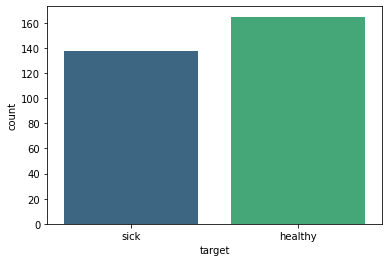

In [9]:
sns.countplot(x = df.target, palette="viridis")
plt.xticks([0, 1], ['sick', 'healthy'])

<AxesSubplot:>

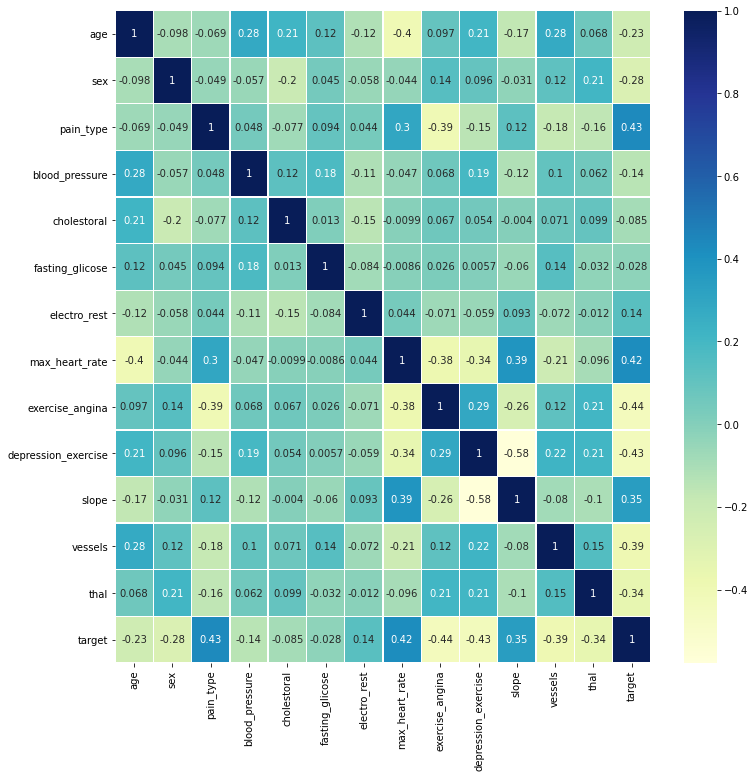

In [10]:
# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True, linewidths=0.3, cmap="YlGnBu")

<AxesSubplot:title={'center':'Correlation with target'}>

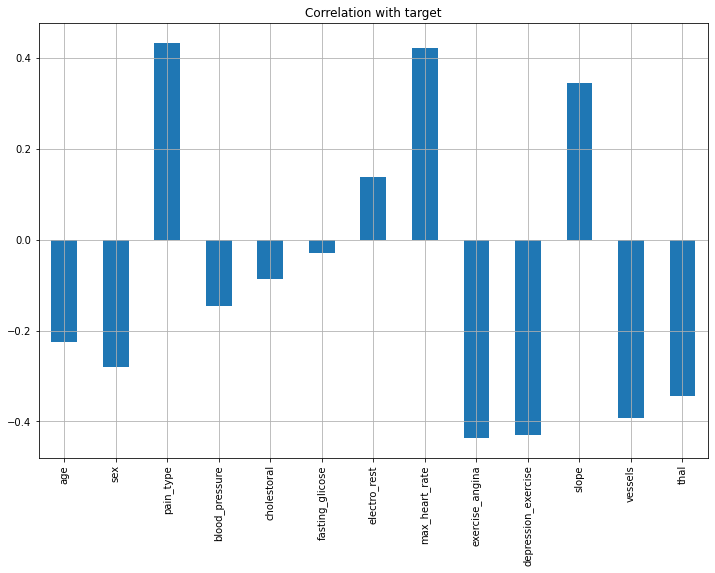

In [11]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

Observe the target is mostly related to the pain_type (0.43), max_heart_rate (0.42) and slope (0.35)

In [12]:
# Splitting dependent and independent variables from the dataframe
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [13]:
# Split train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Feature scaling because of the discrepancies among the columns
from sklearn.preprocessing import StandardScaler

In [15]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Classification libraries

In [16]:
# Importing classification libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [17]:
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    This method tests multiple models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: Dictionary of train, test and result sets
    '''
    dfs = []
    models = [
          ('LogReg', LogisticRegression()), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
          ('DecisionTree', DecisionTreeClassifier())]
    
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['1', '0']
    final = {}
    
    for model_name, model in models:
            kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
            cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
            clf = model.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            final[model_name] = (model, X_train, y_train, X_test, y_test)
            
            print(model_name)
            report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
            report_df = pd.DataFrame(report).transpose()
            display(report_df)
     
    return final

In [18]:
# Visualize perfomance results for each model
final = run_models(X_train, y_train, X_test, y_test)

LogReg


,precision,recall,f1-score,support
1,0.833333,0.862069,0.847458,29.000000
0,0.870968,0.843750,0.857143,32.000000
accuracy,0.852459,0.852459,0.852459,0.852459
macro avg,0.852151,0.852909,0.852300,61.000000
weighted avg,0.853076,0.852459,0.852538,61.000000


RF


,precision,recall,f1-score,support
1,0.857143,0.827586,0.842105,29.000000
0,0.848485,0.875000,0.861538,32.000000
accuracy,0.852459,0.852459,0.852459,0.852459
macro avg,0.852814,0.851293,0.851822,61.000000
weighted avg,0.852601,0.852459,0.852300,61.000000


KNN


,precision,recall,f1-score,support
1,0.870968,0.931034,0.900000,29.000000
0,0.933333,0.875000,0.903226,32.000000
accuracy,0.901639,0.901639,0.901639,0.901639
macro avg,0.902151,0.903017,0.901613,61.000000
weighted avg,0.903684,0.901639,0.901692,61.000000


SVM


,precision,recall,f1-score,support
1,0.838710,0.896552,0.866667,29.000000
0,0.900000,0.843750,0.870968,32.000000
accuracy,0.868852,0.868852,0.868852,0.868852
macro avg,0.869355,0.870151,0.868817,61.000000
weighted avg,0.870862,0.868852,0.868923,61.000000


GNB


,precision,recall,f1-score,support
1,0.838710,0.896552,0.866667,29.000000
0,0.900000,0.843750,0.870968,32.000000
accuracy,0.868852,0.868852,0.868852,0.868852
macro avg,0.869355,0.870151,0.868817,61.000000
weighted avg,0.870862,0.868852,0.868923,61.000000


DecisionTree


,precision,recall,f1-score,support
1,0.787879,0.896552,0.838710,29.000000
0,0.892857,0.781250,0.833333,32.000000
accuracy,0.836066,0.836066,0.836066,0.836066
macro avg,0.840368,0.838901,0.836022,61.000000
weighted avg,0.842949,0.836066,0.835889,61.000000


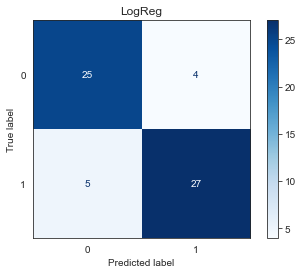

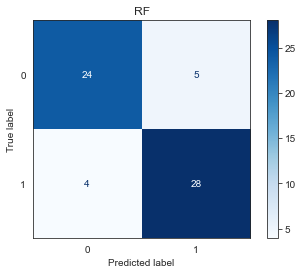

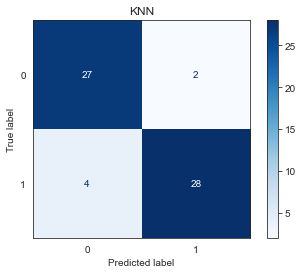

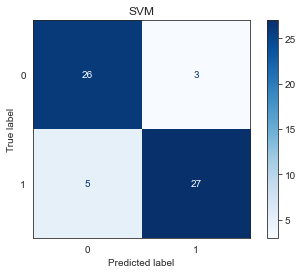

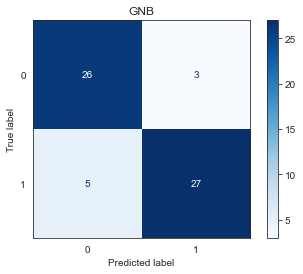

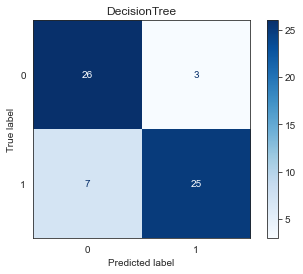

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

sns.set_style("white")

for keys, values in final.items():
    model_name = keys
    (model, X_train, y_train, X_test, y_pred) = values

    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues)
    
    plt.title(model_name)
    plt.show()